# Multilayer Perceptron for Binary Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [64]:
df = pd.read_csv('winequality.csv')

In [ ]:
df.info()

In [70]:
df = df.dropna()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [68]:
df['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

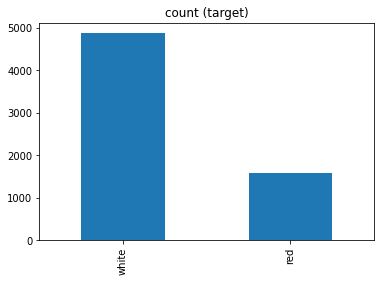

In [69]:
df['type'].value_counts().plot(kind='bar', title='count (target)')

In [42]:
X = df.drop('type', axis=1)
y = df['type']

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [61]:
sc = StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,
                        activation = 'relu',
                        verbose=True,
                        solver = 'adam')

mlp_clf.fit(X_train_scaled, Y_train)

In [ ]:
Y_pred = mlp_clf.predict(X_test_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))

In [ ]:
# class count
class_count_0, class_count_1 = df['type'].value_counts()

# Separate class
class_0 = df[df['type'] == 'white']
class_1 = df[df['type'] == 'red']# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)  # means if input data is repeating or not.

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['type'].value_counts())# plot the count after under-sampeling
test_over['type'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
X = test_over.drop('type', axis=1)
y = test_over['type']

Now try with the over sampled data. If you are getting 100% accuracy again then it shows that your network is too good enough to memorize your data. Try reducing its complexity.

## Hyperparameter tuning

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1)
grid.fit(X_train_scaled, Y_train)

print(grid.best_params_) 

In [ ]:
grid_predictions = grid.predict(X_test_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, grid_predictions)))

## Multilayer Perceptron for Multi-Class Classification

In [ ]:
df = pd.read_csv('Iris_Data.csv')
df['species'].value_counts()

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train_scaled, Y_train)

In [ ]:
y_pred = mlp_clf.predict(X_test_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1)
grid.fit(X_train_scaled, Y_train)

print(grid.best_params_) 

In [ ]:
grid_predictions = grid.predict(X_test_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, grid_predictions)))